# About Dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Dataset link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud




# Imorting libraries and loading dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Preprocessing,Undersampling

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [9]:
legit.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

In [11]:
legit_sample=legit.sample(n=492)

In [12]:
newdf = pd.concat([legit_sample,fraud],axis=0)

In [13]:
newdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202207,134220.0,-0.828197,1.864569,-1.482483,0.445759,0.942623,-0.656468,0.623820,0.769305,-1.046217,...,0.171077,0.232945,-0.213408,0.552477,0.343108,-0.592813,-0.324167,-0.063197,1.00,0
145079,86619.0,-0.940614,1.320305,0.038389,-0.797833,1.378592,-0.464206,1.134298,0.058883,-0.452220,...,0.034562,0.134245,-0.671343,0.543715,1.006060,0.705774,-0.159433,0.068202,12.31,0
47683,43307.0,1.167302,-1.048917,-0.416882,-0.697972,-0.548168,0.187693,-0.414872,0.128203,-0.710859,...,-0.382050,-0.834049,-0.161410,-0.811488,0.332487,1.150923,-0.090818,-0.009569,114.98,0
81217,58834.0,-0.375550,0.665100,1.249095,0.994621,1.213177,0.874204,0.774137,-0.076183,-0.312592,...,-0.124985,0.000887,-0.380461,-1.288382,0.314191,-0.135137,-0.024548,-0.120469,25.28,0
176088,122622.0,-0.281026,0.253794,0.092892,-1.323924,0.651647,-1.541955,0.593249,-0.345807,-1.567806,...,0.083147,0.157551,-0.127395,-0.026989,-0.139079,-0.239434,0.124173,0.181000,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
newdf['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
X=newdf.drop(columns='Class',axis=1)

In [16]:
Y=newdf['Class']

In [17]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
202207,134220.0,-0.828197,1.864569,-1.482483,0.445759,0.942623,-0.656468,0.623820,0.769305,-1.046217,...,-0.460573,0.171077,0.232945,-0.213408,0.552477,0.343108,-0.592813,-0.324167,-0.063197,1.00
145079,86619.0,-0.940614,1.320305,0.038389,-0.797833,1.378592,-0.464206,1.134298,0.058883,-0.452220,...,-0.122600,0.034562,0.134245,-0.671343,0.543715,1.006060,0.705774,-0.159433,0.068202,12.31
47683,43307.0,1.167302,-1.048917,-0.416882,-0.697972,-0.548168,0.187693,-0.414872,0.128203,-0.710859,...,-0.404502,-0.382050,-0.834049,-0.161410,-0.811488,0.332487,1.150923,-0.090818,-0.009569,114.98
81217,58834.0,-0.375550,0.665100,1.249095,0.994621,1.213177,0.874204,0.774137,-0.076183,-0.312592,...,0.244836,-0.124985,0.000887,-0.380461,-1.288382,0.314191,-0.135137,-0.024548,-0.120469,25.28
176088,122622.0,-0.281026,0.253794,0.092892,-1.323924,0.651647,-1.541955,0.593249,-0.345807,-1.567806,...,0.269493,0.083147,0.157551,-0.127395,-0.026989,-0.139079,-0.239434,0.124173,0.181000,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [18]:
Y

202207    0
145079    0
47683     0
81217     0
176088    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# splitting dataset into training and testing data

# Modelling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# Logistic Regression model and evaluation

In [21]:
lr=LogisticRegression()

In [22]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [23]:
Y_train_pred=lr.predict(X_train)
training_accuracy=accuracy_score(Y_train_pred,Y_train)
Y_test_pred=lr.predict(X_test)
testing_accuracy=accuracy_score(Y_test_pred,Y_test)
print("Training Data Accuracy of Logistic Regression Model : ", training_accuracy)
print("Testing Data Accuracy of Logistic Regression Model : ", testing_accuracy)

Training Data Accuracy of Logistic Regression Model :  0.9453621346886912
Testing Data Accuracy of Logistic Regression Model :  0.9238578680203046


In [24]:
from sklearn.metrics import classification_report , confusion_matrix

In [25]:
cm = confusion_matrix(Y_test,Y_test_pred)

<AxesSubplot:>

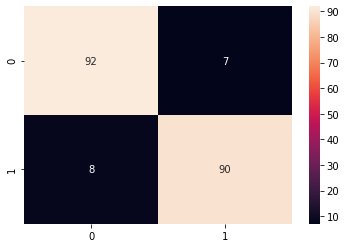

In [26]:
sns.heatmap(cm ,annot=True)

In [27]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.93      0.92      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



# KNN model and evaluation

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [30]:
Y_predict =knn_model.predict(X_test)

In [31]:
cm = confusion_matrix(Y_test,Y_predict)

<AxesSubplot:>

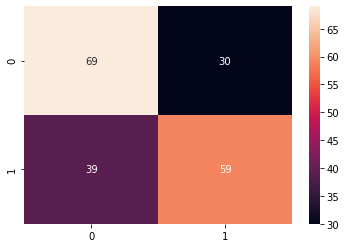

In [32]:
sns.heatmap(cm ,annot=True)

In [33]:
print("Test set Accuracy: ", accuracy_score(Y_test,Y_predict))

Test set Accuracy:  0.649746192893401


In [34]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62944162, 0.62944162, 0.65482234, 0.65989848, 0.64974619,
       0.65482234, 0.64974619, 0.64974619, 0.64974619])

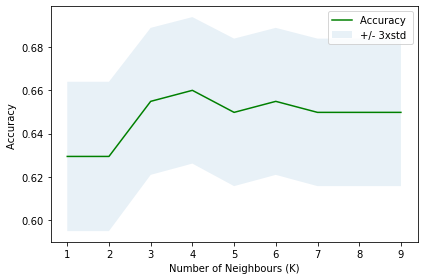

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [36]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6598984771573604 with k= 4


In [37]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc=sc.fit_transform(X_train)
x_test_sc=sc.transform(X_test)

# Decision Tree model and evaluation

In [38]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_Df = clf2.predict(X_test)

In [39]:
print("Decision Tree Accuracy:",accuracy_score(Y_test, y_pred_Df))

print(classification_report(Y_test,y_pred_Df))

Decision Tree Accuracy: 0.9086294416243654
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        99
           1       0.97      0.85      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



# SVM model and evaluation

In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC(kernel='linear', random_state = 0)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [42]:
y_predict =svm_model.predict(X_test)

In [43]:
cm = confusion_matrix(Y_test,y_predict)

<AxesSubplot:>

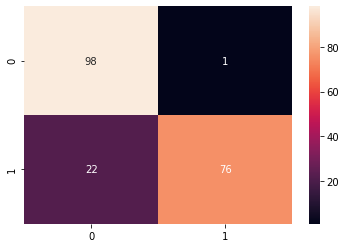

In [44]:
sns.heatmap(cm ,annot=True)

In [45]:
print("SVM Accuracy:",accuracy_score(Y_test, y_predict))

print(classification_report(Y_test,y_predict))

SVM Accuracy: 0.883248730964467
              precision    recall  f1-score   support

           0       0.82      0.99      0.89        99
           1       0.99      0.78      0.87        98

    accuracy                           0.88       197
   macro avg       0.90      0.88      0.88       197
weighted avg       0.90      0.88      0.88       197



# Random Forest Classifier model and evaluation

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.9238578680203046
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [47]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Extra Tree Classifier model and Evaluation

In [48]:
clf=ExtraTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.8781725888324873
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        99
           1       0.89      0.87      0.88        98

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



# AdaBoost Classifier model and Evaluation

In [49]:
clf=AdaBoostClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.9187817258883249
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        99
           1       0.92      0.92      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



# Gradient Boosting Classifier model and Evaluation

In [50]:
clf=GradientBoostingClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.9238578680203046
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



# GaussianNB Classifier model and Evaluation

In [51]:
clf=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.8629441624365483
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        99
           1       0.97      0.74      0.84        98

    accuracy                           0.86       197
   macro avg       0.88      0.86      0.86       197
weighted avg       0.88      0.86      0.86       197



# XgBoost Classifier model and Evaluation

In [52]:
from xgboost import XGBClassifier

In [53]:
clf=XGBClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred_RF))

print(classification_report(Y_test,y_pred_RF))

Accuracy: 0.9238578680203046
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



### Logistic Regression,Random Forest Classifier,Gradient Boosting Classifier,XgBoost Classifier are giving best accuracy of 92.38578680203046% in detecting fraud credit card transactions